# Categorical Support Vector Classifier

** The idea of this project is for  365Datascience ** 

## Imports

In [1]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 
import seaborn as sns
sns.set()

## Loading the database

#### Read the csv file and study the database

In [2]:
df=pd.read_csv('social.csv',dtype=str)

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.00,19000.00,0
1,15810944,Male,35.00,20000.00,0
2,15668575,Female,26.00,43000.00,0
3,15603246,Female,27.00,57000.00,0
4,15804002,Male,19.00,76000.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    object
 1   Gender           400 non-null    object
 2   Age              400 non-null    object
 3   EstimatedSalary  400 non-null    object
 4   Purchased        400 non-null    object
dtypes: object(5)
memory usage: 15.8+ KB


In [4]:
#Cast remaining data columns to floats or int
df["Age"] = df["Age"].astype(float)
df["EstimatedSalary"] = df["EstimatedSalary"].astype(float)
df["Purchased"] = df["Purchased"].astype(int)

In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Preprocessing

#### Define the target and the inputs

In [27]:
target=df.Purchased
inputs=df.drop(["Purchased", "User ID", 'Gender'], axis=1)
print("The shape of target is", target.shape, "and the shape of inputs is", inputs.shape)

The shape of target is (400,) and the shape of inputs is (400, 2)


#### Create a training and a testing dataset

In [28]:
x_train, x_test, y_train, y_test=train_test_split(
    inputs, target, 
    test_size=0.2,
    random_state=356, stratify=target
)

#### Check the result from the stratification

In [29]:
print("The shape of y_train is", y_train.shape, "and the shape of x_train is", x_train.shape)

The shape of y_train is (320,) and the shape of x_train is (320, 2)


In [30]:
y_train.value_counts(), y_test.value_counts()

(0    206
 1    114
 Name: Purchased, dtype: int64,
 0    51
 1    29
 Name: Purchased, dtype: int64)

#### Define a separate encoder for the target and the inputs 

In [31]:
enc_inp=OrdinalEncoder()
#enc_tar=LabelEncoder()

#### Apply the fit_transform() method on the training data and the transform() method on the test data.

In [32]:
x_train_tranf=enc_inp.fit_transform(x_train)
x_test_tranf=enc_inp.fit_transform(x_test)
 

   

In [33]:
x_test_tranf[:2], x_train_tranf[:2]

(array([[24., 44.],
        [15., 29.]]),
 array([[42., 18.],
        [23., 42.]]))

## Rescaling

### In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

In [34]:
scaling=MinMaxScaler(feature_range=(-1,1)).fit(x_train_tranf)
x_train_rescal=scaling.fit_transform(x_train_tranf)

In [35]:
x_train_rescal[:3]

array([[ 1.        , -0.67857143],
       [ 0.0952381 , -0.25      ],
       [ 0.38095238,  0.5       ]])

## Classification

In [36]:
c=1.0
svc=svm.SVC(kernel="linear", C=c)

In [37]:
#fit model
model=svc.fit(x_train_rescal,y_train)
model

SVC(kernel='linear')

## Evaluation

#### Evaluate the model on the test data

In [38]:
y_pred_test=model.predict(scaling.transform(x_test_tranf))

In [39]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

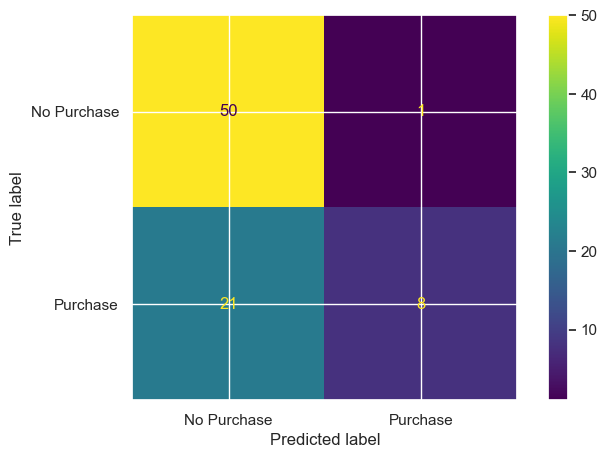

In [40]:
#Analyze the results of the classifier first with the help of a confusion matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_test),
    display_labels=["No Purchase", "Purchase"],
)

cmp.plot(ax=ax);

In [41]:
print(classification_report(y_test, y_pred_test, target_names=["No Purchase", "Purchase"]))

              precision    recall  f1-score   support

 No Purchase       0.70      0.98      0.82        51
    Purchase       0.89      0.28      0.42        29

    accuracy                           0.72        80
   macro avg       0.80      0.63      0.62        80
weighted avg       0.77      0.72      0.68        80



## Plot

In [42]:
knn_palette = sns.color_palette([ '#29757A', '#FF5050'])
knn_palette

[(0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

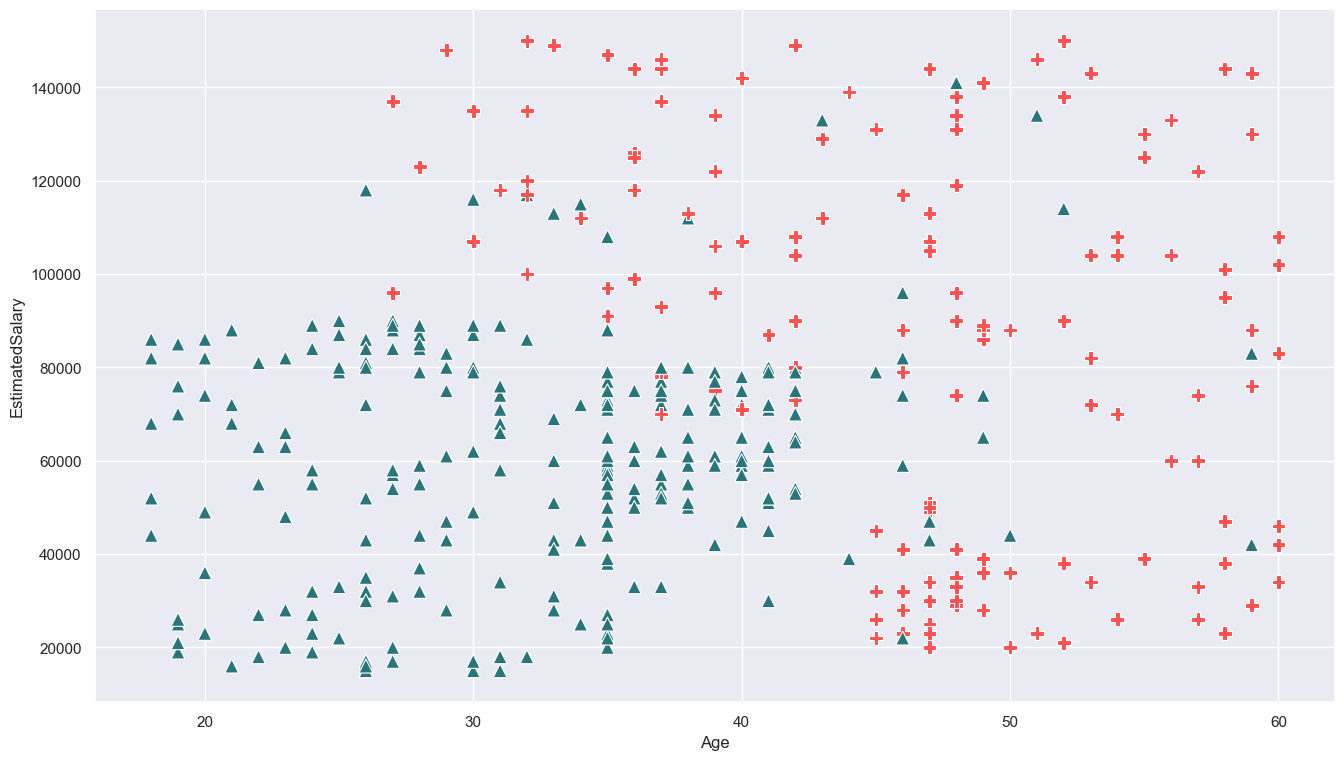

In [43]:
%matplotlib inline

# Set the size of the figure
plt.figure(figsize = (16, 9))

# Create a scatter plot.
e no use of it in this example.
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', 
                data = inputs, 
                hue = target, 
                palette = knn_palette,
                markers = ['^', 'P'],
                style = target, 
                s = 100, 
                alpha = 1,
                legend = False);

In [44]:
import time
# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

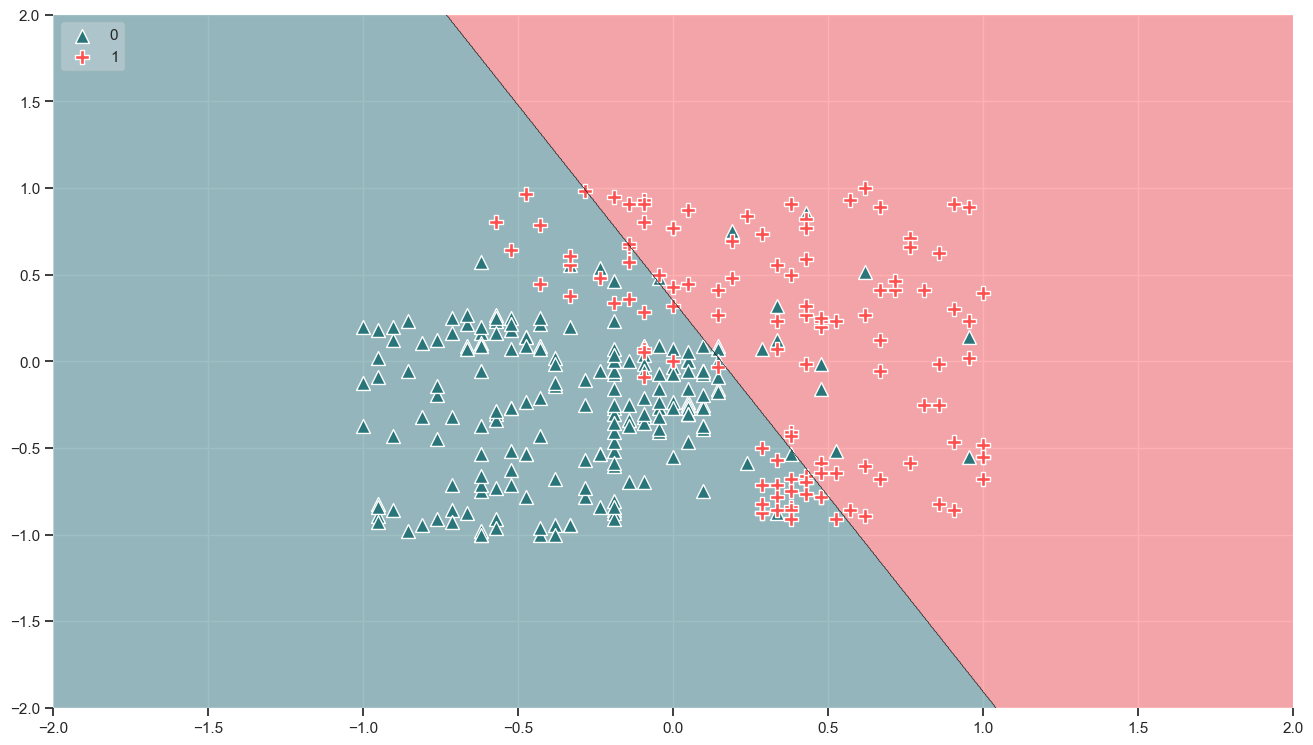

In [45]:
# plot the decision regions

start = time.time()

plt.figure(figsize = (16, 9))

plot_decision_regions(X = x_train_rescal, y = y_train.to_numpy(), #cast the y_train variable to a numpy array
                      clf = svc,
                      markers = ['^', 'P'],
                      colors = '#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 2)
;

end = time.time()